HOG + K-MEANS

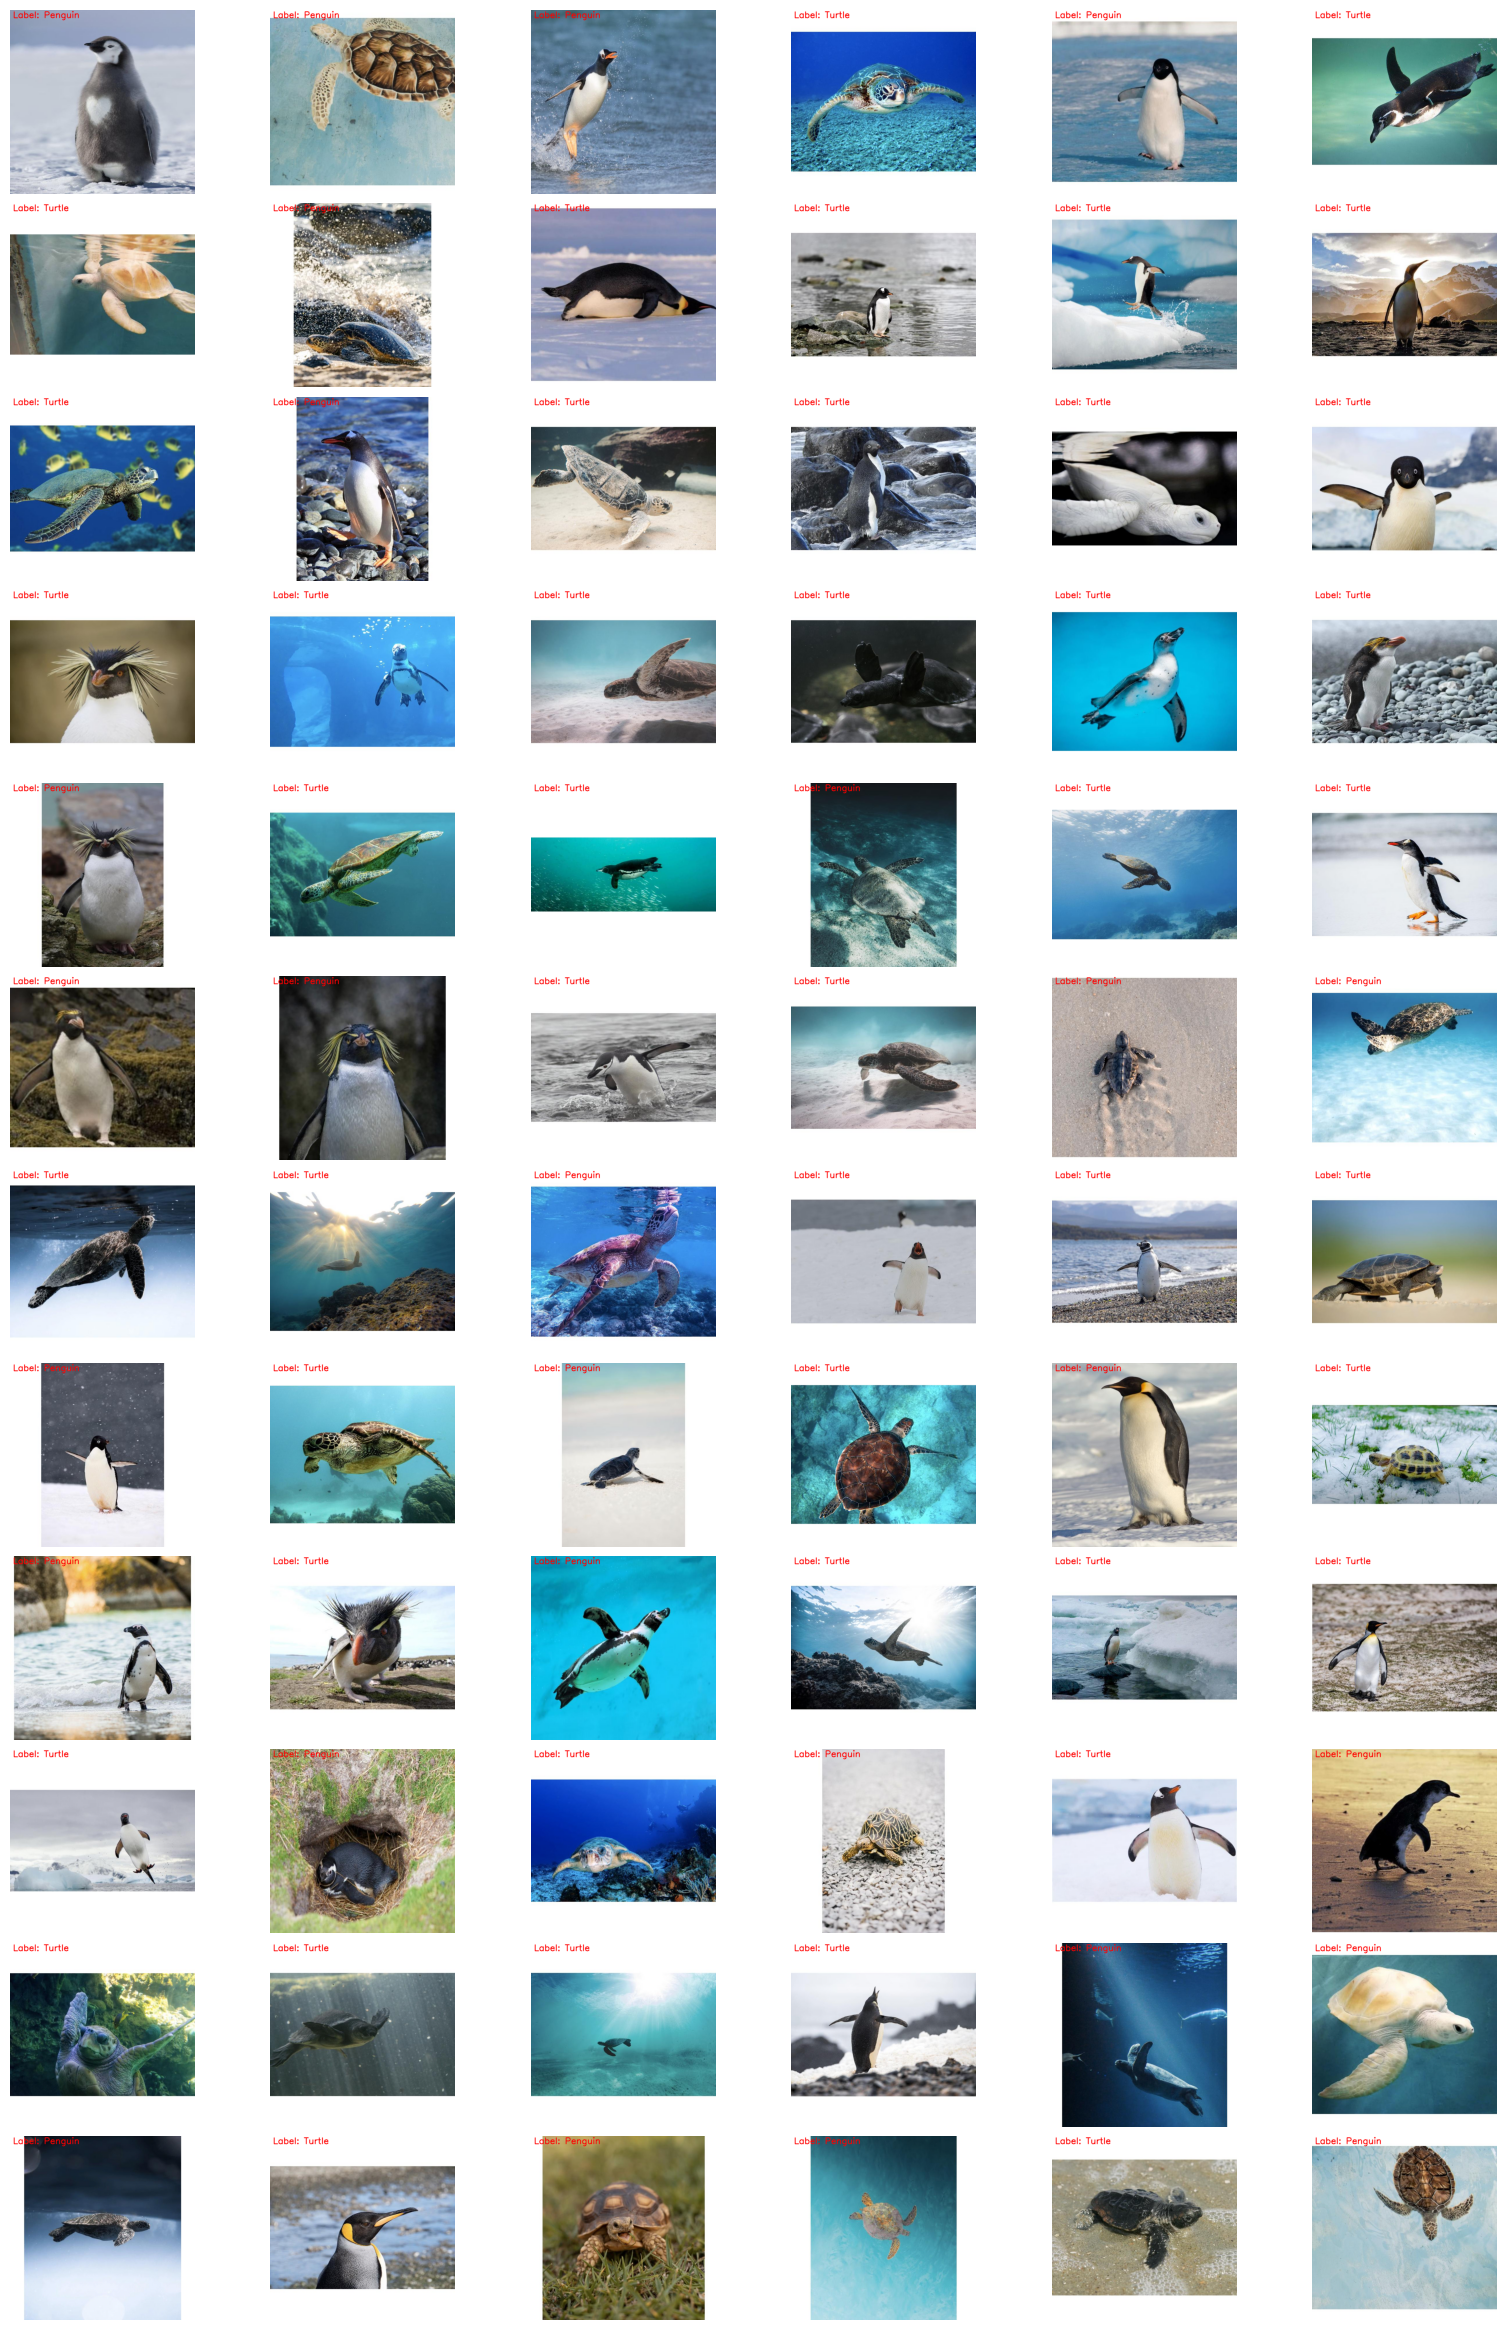

In [20]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the dimensionality after dimensionality reduction
n_components = 100  

# Define the paths for training and testing images
train_path = "./train"
test_path = "./valid"

# Define the feature extraction method (using HOG as an example)
def extract_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize the image
    resized_image = cv2.resize(gray_image, (64, 128))  # Resize to 64x128
    winSize = (64, 128)
    blockSize = (16, 16)
    blockStride = (8, 8)
    cellSize = (8, 8)
    nbins = 9

    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    hog_features = hog.compute(resized_image)
    hog_features = np.squeeze(hog_features)
    return hog_features

# Load training images and extract features
train_features = []
for i in range(500):
    image_path = os.path.join(train_path, f"image_id_{i:03d}.jpg")
    image = cv2.imread(image_path)
    features = extract_features(image)
    train_features.append(features)
train_features = np.array(train_features).astype(np.float64)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=n_components)
train_features = pca.fit_transform(train_features)

# Use K-Means for clustering
n_clusters = 2  # Two categories: penguins and turtles
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(train_features)

# Load test images and annotate them
num_images = 72
num_rows = 12
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

for i in range(num_images):
    image_path = os.path.join(test_path, f"image_id_{i:03d}.jpg")
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (64, 128))  # Resize to 64x128
    features = extract_features(resized_image)
    test_features = pca.transform([features])  # Perform dimensionality reduction using PCA from the training set
    cluster_label = kmeans.predict(test_features)[0]  # Predict the cluster to which the image belongs
    if cluster_label != 0:
        label = 1  # Penguin
    else:
        label = 2  # Turtle
    
    if label == 1:
        category = 'Penguin'
    else:
        category = 'Turtle'
    cv2.putText(image, f"Label: {category}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Show the image in the subplot
    ax = axes[i % num_rows, i // num_rows]
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Show the images in the notebook
plt.show()


HOG + RANDOM FOREST

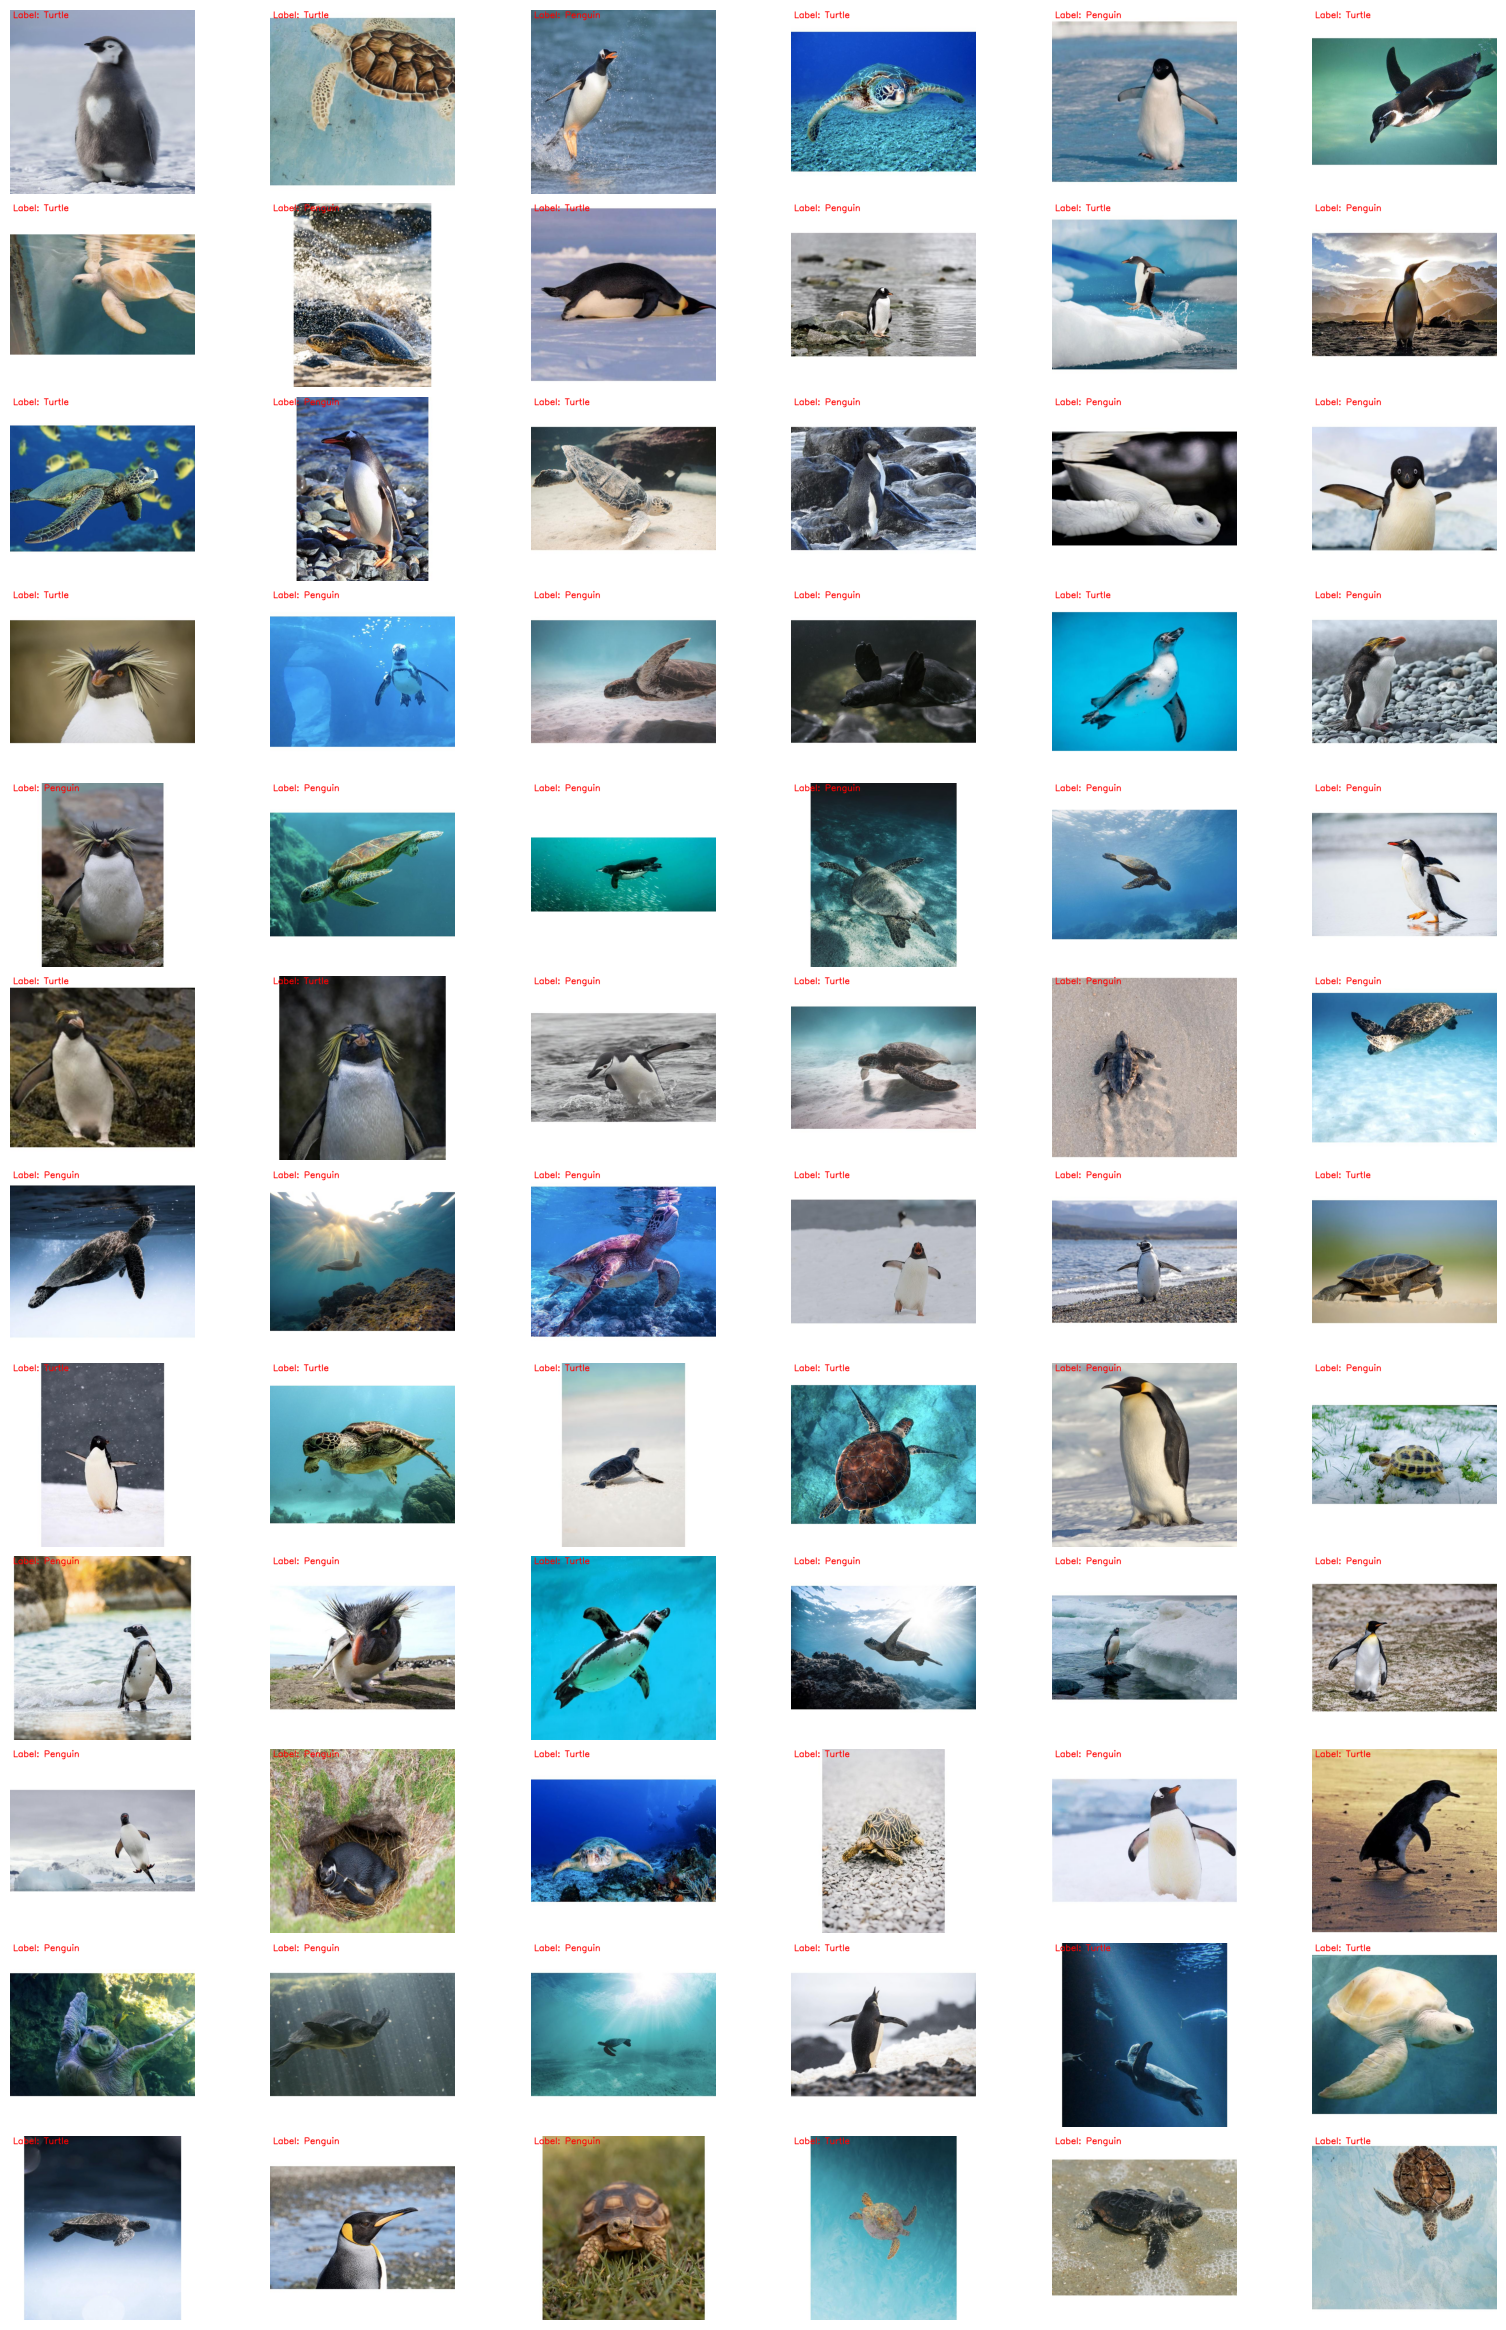

In [26]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the dimensionality after dimensionality reduction
n_components = 100

# Define the paths for training and testing images
train_path = "./train"
test_path = "./valid"

# Define the feature extraction method (using HOG as an example)
def extract_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image
    resized_image = cv2.resize(gray_image, (64, 128))  # Resize to 64x128

    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(resized_image)
    hog_features = np.squeeze(hog_features)
    return hog_features

# Load training images and extract features
train_features = []
train_labels = []
for i in range(500):
    image_path = os.path.join(train_path, f"image_id_{i:03d}.jpg")
    image = cv2.imread(image_path)
    features = extract_features(image)
    train_features.append(features)
    if i < 250:
        train_labels.append(1)  # Label 1 for penguin
    else:
        train_labels.append(2)  # Label 2 for turtle

train_features = np.array(train_features).astype(np.float64)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=n_components)
train_features = pca.fit_transform(train_features)

# Use Random Forest for classification
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Load test images and annotate them
num_images = 72
num_rows = 12
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

for i in range(num_images):
    image_path = os.path.join(test_path, f"image_id_{i:03d}.jpg")
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (64, 128))  # Resize to 64x128
    features = extract_features(resized_image)
    test_features = pca.transform([features])  # Perform dimensionality reduction using PCA from the training set
    predicted_label = rf_classifier.predict(test_features)[0]  # Predict the label for the image

    if predicted_label == 1:
        category = 'Penguin'
    else:
        category = 'Turtle'
    cv2.putText(image, f"Label: {category}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Show the image in the subplot
    ax = axes[i % num_rows, i // num_rows]
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Show the images in the notebook
plt.show()
